# 2D Drift-Diffusion Equation
Let $\Omega = \Omega_1\times\Omega_2$ and 

$$
    J(u, \epsilon, \mathbf b) = 
    \frac{1}{2}\iint_{\Omega}\!
    (u - u_d)^2\, d\mathbf x 
    + \frac{\alpha}{2}\iint_{\Omega}\!
    \mathbf b \cdot \mathbf b\, d\mathbf x
    + \frac{\beta}{2} \epsilon^2
$$

where 

$$
\begin{align*}
    -\epsilon\Delta u + \mathbf b\cdot\nabla u &= f 
    \text{ in }\Omega \\
    u &= 0 
    \text{ on }\partial\Omega
\end{align*}
$$

The goal is to find $(\epsilon, \mathbf b)$ that
minimizes $J(u, \epsilon, \mathbf b)$ where
$u$ is constrained by the above PDE.

Then the directional derivative of $J$ with respect
to $\epsilon$ and $\mathbf b$ in the (arbitrary) directions of $\tilde \epsilon$ and $\tilde{\mathbf b}$, respectively, are

$$
\begin{align*}
    J_\epsilon(\tilde \epsilon) 
    &= 
    \beta\epsilon\tilde\epsilon
    - 
    \tilde\epsilon\iint_\Omega\!\nabla u\cdot\nabla p\,dxdy, 
\\
    J_{\mathbf b}(\tilde{\mathbf b}) 
    &= 
    \iint_\Omega\!\mathbf b \cdot\tilde{\mathbf b}\,dxdy
    + 
    \iint_\Omega\!(\tilde{\mathbf b}\cdot\nabla u)p\,dxdy
\end{align*}
$$

where the adjoint function $p$ solves

$$
\begin{align*}
    \epsilon\iint_\Omega\! \nabla\tilde u\cdot\nabla p\, dxdy - \iint_\Omega(\mathbf b \cdot \nabla\tilde u)p\, dxdy
    = \iint_\Omega\!(u - u_d)\tilde u\, dxdy
\end{align*}
$$

for all $\tilde u$.

## Theoretical Calculations

### Lagrangian calculations
Let $F(u, \epsilon, \mathbf b) = -\epsilon\Delta u + \mathbf b\cdot\nabla u - f$ 
so that the drift-diffusion PDE is 
$F(u, \epsilon, \mathbf b) = 0$. Using directional derivatives of the Lagrangian

$$
\mathcal{L}(u, \epsilon, \mathbf b, p) = 
J(u, \epsilon, \mathbf b) + 
\langle p, F(u, \epsilon, \mathbf b)\rangle
$$

we can write down the analytic weak formulations 
of the state, adjoint, and sensitivity equations:

$$
\begin{align}
    \mathcal{L}_p(u, \epsilon, \mathbf b, p)(\tilde p) &= 
    \iint\! \epsilon\nabla u\cdot\nabla\tilde p \,dxdy 
    - \iint\! f\tilde p \,dxdy\\
    \mathcal{L}_u(u, \epsilon, \mathbf b, p)(\tilde u) &= 
    \iint\! (u-u_d)\tilde u\, dxdy
    + \iint\!  \,dxdy\\
    \mathcal{L}_\epsilon(u, \epsilon, \mathbf b, p)(\tilde \epsilon) &= 
    \beta\epsilon\tilde\epsilon
    - 
    \iint_\Omega\!\tilde\epsilon\nabla u\cdot\nabla p\,dxdy\\
    \mathcal{L}_{\mathbf b}(u, \epsilon, \mathbf b, p)(\tilde{\mathbf b}) &= 
    \alpha\iint_\Omega\!\mathbf b \cdot\tilde{\mathbf b}\,dxdy
    + 
    \iint_\Omega\!(\tilde{\mathbf b}\cdot\nabla u)p\,dxdy
\end{align}
$$

The goal of this section is to rewrite these as 
Kronecker products of matrices whose entries are
integrals over $\Omega_1$ and $\Omega_2$. 
Note the arbitrary directions
(denoted with tildes) need only be computed for each
basis element. The big picture flow is:

1. Given $\epsilon$ and $\mathbf b$, solve the state equation $\mathcal L_p(\tilde p) = 0$ for $u$.
1. Given $\epsilon$, $\mathbf b$, and $u$, solve the adjoint equation $\mathcal L_u(\tilde u) = 0$ for $p$.
1. Given $\epsilon$, $\mathbf b$, $u$, and $p$, compute the functional sensitivities 
$\mathcal L_\epsilon(\tilde\epsilon)$ and 
$\mathcal L_{\mathbf b}(\tilde{\mathbf b})$,
which give $\frac{dJ}{d\epsilon}$ and $\frac{dJ}{d\mathbf b}$, respectively.
1. Update $\epsilon$ and $\mathbf b$ using a gradient descent algorithm.
1. Return to step 1.

### State equation discretization
We obtain the state equation by setting (1) equal to zero. In other words, $\mathcal{L}_p(u, \epsilon, \mathbf b, p)(\tilde p) =0$ after discretization is the same as $Au - b = 0$. 
Now, the stiffness matrix $A$ is 

$$
A_{ij,k\ell} = 
\epsilon\int\! \phi'_k\hat\phi'_i \,dx 
\int\! \phi_\ell\hat\phi_j \,dy
+ \epsilon\int\! \phi_k\hat\phi_i \,dx 
\int\! \phi'_\ell\hat\phi'_j \,dy
+ \int\! b_1\phi'_k\hat\phi_i \,dx
\int\! \phi_\ell\hat\phi_j \,dy
+ \int\! \phi_k\hat\phi_i \,dx
\int\! b_2 \phi'_\ell\hat\phi_j \,dy
$$

Further assuming $f$ is separable such that 
$f(x,y) = f_1(x)f_2(y)$, the right hand side 
of the linearized state equation is

$$
b_{ij} = \int\! f_1 \hat\phi_i\, dx
\int\! f_2\hat\phi_j\, dy
$$

### Adjoint equation discretization
We obtain the adjoint equation by setting (2) equal to zero.
In other words, $\mathcal{L}_u(u, \epsilon, \mathbf b, p)(\tilde u) = 0$
after discretization is the same as $A^T p - c = 0$
To solve the adjoint equation $A^T p = c$ we need only
compute the right hand side $c$ and apply vanishing boundary conditions on $p$. 
Let $r(x,y) = u_d(x,y) - u(x,y)$ so that 
$r(x,y) = \sum_{ij}r_{ij}\phi_i(x)\phi_j(y)$.
It follows that the adjoint right hand side is

$$
c_{ij} = \int_\Omega\! r(x,y)\phi_i\phi_j \,dxdy 
= \sum_{k\ell}r_{k\ell}
\int\! \phi_k\phi_i\, dx
\int\! \phi_\ell\phi_j\, dy
$$

or in vector notation $c = r^T M\otimes M$
where $M_{ij} = \int_\Omega\! \phi_i\phi_j \, dx$
and $r$ is the vector of nodal values of $u_d - u$.

### Sensitivity equation discretization
We obtain the sensitivity equation by setting (3) equal to zero, since we will have a local optimum when the gradient vanishes. In practice, we are only interested
in computing 
$\mathcal{L}_\epsilon(\tilde \epsilon)$
and
$\mathcal{L}_{\mathbf b}(\tilde{\mathbf b})$
to inform how we can update $\epsilon$ and $\mathbf b$, respectively.
This way we hope to converge to optimal parameters
$\epsilon^*$ and $\mathbf b^*$ so that 
$\mathcal{L}_\epsilon(\tilde \epsilon) = 0$
and
$\mathcal{L}_{\mathbf b}(\tilde{\mathbf b}) = 0$
for all $\tilde\epsilon$ and $\tilde{\mathbf b}$, respectively.
After solving the state and adjoint equations we have
$u$ and $p$, so we need only compute

$$\begin{align*}
    \frac{dJ}{d\epsilon} &= p \left(\frac{\partial b}{\partial \epsilon} 
    - \frac{\partial A}{\partial \epsilon}u\right)
    + \frac{\partial J}{\partial \epsilon}\\
    \frac{dJ}{d{\mathbf b}} &= p \left(\frac{\partial b}{\partial {\mathbf b}} 
    - \frac{\partial A}{\partial{\mathbf b}}u\right)
    + \frac{\partial J}{\partial{\mathbf b}}
\end{align*}$$

### Partial derivatives for $A$, $b$, $J$
First we want to compute 
$\frac{\partial A}{\partial\epsilon}$ and
$\frac{\partial A}{\partial\mathbf b}$.
Recall

$$
A_{ij,k\ell} = 
\epsilon\int\! \phi'_k\hat\phi'_i \,dx 
\int\! \phi_\ell\hat\phi_j \,dy
+ \epsilon\int\! \phi_k\hat\phi_i \,dx 
\int\! \phi'_\ell\hat\phi'_j \,dy
+ \int\! b_1\phi'_k\hat\phi_i \,dx
\int\! \phi_\ell\hat\phi_j \,dy
+ \int\! \phi_k\hat\phi_i \,dx
\int\! b_2 \phi'_\ell\hat\phi_j \,dy
$$

The $\epsilon$ derivative is straightforward
since $\epsilon$ is a constant. Indeed, we have

$$
\frac{\partial A_{ij,k\ell}}{\partial\epsilon} = 
\int\! \phi'_k\hat\phi'_i \,dx 
\int\! \phi_\ell\hat\phi_j \,dy
+ \int\! \phi_k\hat\phi_i \,dx 
\int\! \phi'_\ell\hat\phi'_j \,dy
$$

We are assuming $\mathbf b = (b_1(x), b_2(y))^T$ 
with finite element basis 

$$
\left\{
\begin{pmatrix}\phi_1\\ 0\end{pmatrix}, 
\ldots, 
\begin{pmatrix}\phi_n\\ 0\end{pmatrix},
\begin{pmatrix}0 \\\phi_1\end{pmatrix},
\ldots,
\begin{pmatrix}0 \\\phi_n\end{pmatrix}
\right\}
$$

Thus $\frac{dA}{d\mathbf b}$ will be a tensor
with shape $(n^2, n^2, 2n)$ where we use the
directions of
$\tilde{\mathbf b}(x,y) = (\phi_r(x), 0)^T$ 
for $1\leq r \leq n$ and 
$\tilde{\mathbf b}(x,y) = (0, \phi_r(y))^T$
for $n < r \leq 2n$ when computing
$\frac{dA}{d\mathbf b_r}$.
Therefore,

$$
\begin{align*}
\frac{\partial A_{ij,k\ell}}{\partial\mathbf b_{r}} &= 
\int\! \phi_r\phi'_k\hat\phi_i \,dx
\int\! \phi_\ell\hat\phi_j \,dy,
\quad 1\leq r \leq n\\
\frac{\partial A_{ij,k\ell}}{\partial\mathbf b_{r}} &=
\int\! \phi_k\hat\phi_i \,dx
\int \phi_{r-n} \phi'_\ell\hat\phi_j \,dy,
\quad n<r\leq 2n
\end{align*}
$$

Since the right hand side of $Au=b$ is independent of both $\epsilon$ and $\mathbf b$, it follows that $\frac{\partial b}{\partial\epsilon} = 0$
and $\frac{\partial b}{\partial\mathbf b} = 0$.

Notice when we sum over $k\ell$ with $u$ and sum over $ij$ with $p$
we obtain the $\iint_\Omega\!(\tilde{\mathbf b}\cdot\nabla u)p\,dxdy$ 
term in the above sensitivity equation 
$\mathcal{L}_{\mathbf b}(\tilde{\mathbf b})$,
which happens to also be 
$p \left(\frac{\partial b}{\partial {\mathbf b}} 
    - \frac{\partial A}{\partial{\mathbf b}}u\right)$
from the above expression for $\frac{dJ}{d{\mathbf b}}$

Similarly, 
$\frac{\partial J}{\partial\epsilon} = \beta\epsilon$ 
so now we need to compute the discretized
$\frac{\partial J}{\partial {\mathbf b}}(\tilde{\mathbf b}) = \alpha\iint\! \mathbf b \cdot \tilde{\mathbf b} \,dxdy$,

$$
\begin{align*}
\frac{\partial J}{\partial \mathbf b_{r}} &= 
\alpha\int\! b_1\phi_r \,dx
\int\! \,dy,
\quad 1\leq r \leq n\\
\frac{\partial J}{\partial \mathbf b_{r}} &=
\alpha\int\! \,dx
\int\! b_2\phi_{r-n} \,dy,
\quad n < r \leq 2n
\end{align*}
$$

### Alternative regularization
Suppose we wanted $\alpha$ to regulate $\iint\nabla(b)\cdot\nabla(b)\,dxdy$ instead.
All that would change in the above calculations is the partial derivatives wrt $\mathbf b$
and $\nabla b$ will have the basis $\{(\phi'_r(x), 0), (0, \phi'_r(y))\}$
So now
$\frac{\partial J}{\partial {\mathbf b}}(\tilde{\mathbf b}) = \alpha\iint\! \nabla\mathbf b \cdot \nabla\tilde{\mathbf b} \,dxdy$
and hence

$$
\begin{align*}
\frac{\partial J}{\partial \mathbf b_{r}} &= 
\alpha\int\! b'_1\phi'_r \,dx
\int\! \,dy,
\quad 1\leq r \leq n\\
\frac{\partial J}{\partial \mathbf b_{r}} &=
\alpha\int\! \,dx
\int\! b'_2\phi'_{r-n} \,dy,
\quad n < r \leq 2n
\end{align*}
$$

Next we will fit this model to some synthetic data, look at the fit,
and compare it to this alternate regularization scheme.

## Numerical Calculations

### Imports and helpful functions

In [2]:
import sys
sys.path.append(sys.path[0] + '/..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.optimize as opt
from fenics import *
from product_fem import product_fem as pf
from product_fem.equations import DriftDiffusion

In [3]:
# constant parameters
n = 22 # mesh resolution
eps = -9.0e-02 # diffusion coefficient
f = (['-1.0'], ['1.0']) # forcing function
alpha, beta = 1.0e-08, 0. # regularization parameters

def plot_u(u, W, title=None):
    n = W.V.dim()
    V_coords = W.dofmap.marginal_dof_coords
    X, Y = np.meshgrid(V_coords, V_coords, indexing='ij')
    Z = u.reshape(n, n) if u.ndim==1 else u

    fig, ax = plt.subplots(figsize=(6,6))
    a = ax.contourf(X, Y, Z, levels=8)
    ax.set_aspect('equal')
    if title: ax.set_title(title, fontsize=15)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(a, cax=cax, orientation='vertical')
    plt.show()
    
def plot_us(us, W, titles=None, cbar_scale=None, **kwargs):
    n = W.V.dim()
    V_coords = W.dofmap.marginal_dof_coords
    X, Y = np.meshgrid(V_coords, V_coords, indexing='ij')
    Zs = [u.reshape(n, n) if u.ndim==1 else u for u in us]
    
    if cbar_scale=='same':
        levels = np.linspace(np.min(Zs), np.max(Zs), 8)
    else:
        levels = 8
    fig, ax = plt.subplots(1, len(us), figsize=(10, 5), sharey=True, **kwargs)
    for i in range(len(us)):
        a = ax[i].contourf(X, Y, Zs[i], levels=levels)
        ax[i].set_title(titles[i], fontsize=15)
        ax[i].set_aspect('equal')
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(a, cax=cax, orientation='vertical')
    plt.show()
    
def plot_b(b, W, labels=None):
    n = W.V.dim()
    V_coords = W.dofmap.marginal_dof_coords
    fig, (ax1, ax2) = plt.subplots(2)
    
    if isinstance(b, tuple):
        for i, bi in enumerate(b):
            bi1, bi2 = np.split(bi, [n])
            if labels:
                ax1.plot(V_coords, bi1, label=labels[i])
                ax2.plot(V_coords, bi2, label=labels[i])
                ax1.legend(loc='upper center', 
                           bbox_to_anchor=(0.5, 1.4), 
                           ncol=len(labels), 
                           fontsize=12)
            else:
                ax1.plot(V_coords, bi1)
                ax2.plot(V_coords, bi2)
    else:
        b1, b2 = np.split(b, [n])
        ax1.plot(V_coords, b1)
        ax2.plot(V_coords, b2)
    ax1.set_ylabel(r'$b_1$', labelpad=1, rotation=0, fontsize=15)
    ax2.set_ylabel(r'$b_2$', labelpad=10, rotation=0, fontsize=15)
    plt.show()
    
def plot_results(results, b0, b_true):
    b_hat = results['x']
    plot_b((b_true, b_hat), W, labels=(r'$b$', r'$\hat b$'))
    
    u0 = eqn.solve(eps, b0)
    u_hat = eqn.solve(eps, b_hat)
    
    plot_us((u_d, u_hat), W, titles=(r'$u$', r'$\hat u$'), cbar_scale='same')
    plot_u(np.abs(u_d - u_hat), W, title=r'$|u - \hat u|$')
    
def b_to_array(b, V):
    b = tuple([pf.to_array(bi, V) for bi in b])
    return np.concatenate(b)

### Forward pass inspection

In [4]:
# mesh and function spaces
mesh = UnitIntervalMesh(n-1)
V = FunctionSpace(mesh, 'CG', 1)
W = pf.ProductFunctionSpace(V)

# boundary conditions
# u_bdy = lambda x, y: u(x,y) on boundary
bc = pf.ProductDirichletBC(W, 0, 'on_boundary')
eqn = DriftDiffusion(W, f, bc, alt_reg=False)

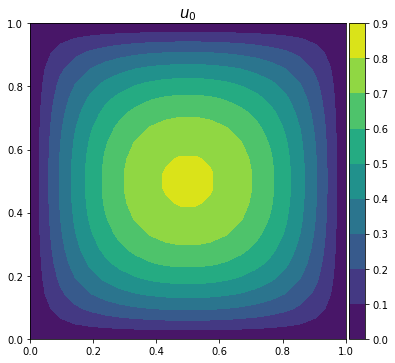

In [5]:
b0 = np.zeros(2*V.dim()) # drift free diffusion
u0 = eqn.solve(eps, b0)
plot_u(u0, W, title=r'$u_0$')

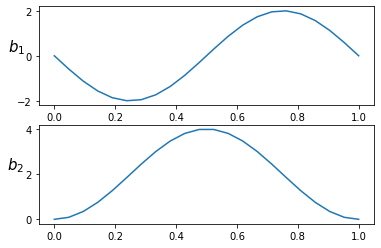

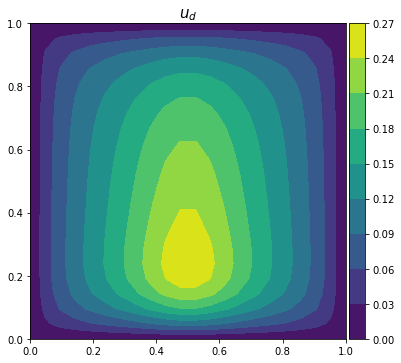

In [7]:
b_true = eqn.b_str_to_array(['-2*sin(2*pi*x[0])', '-2*cos(2*pi*x[0])+2']) # avocado soln
# b_true = eqn.b_str_to_array(['-2 / (1 + exp(-50 * (x[0] - 0.5))) + 1', '0'])
plot_b(b_true, W)
u_d = eqn.solve(eps, b_true)
plot_u(u_d, W, title=r'$u_d$')

In [8]:
# compare Au to f to verify solution
assert np.allclose(eqn.stiffness.dot(u_d), eqn.rhs)

## Optimization

In [7]:
def optimize_b(b0, u_d, alt_reg):
    eqn = DriftDiffusion(W, f, bc, u_d, alt_reg)
    
    def loss_and_grad(b, *args):
        eps, alpha, beta = args
        J, grads = eqn.compute_gradient(eps, b, alpha, beta, loss=True)
        return J, grads

    fun = loss_and_grad
    args = (eps, alpha, beta)
    method = 'L-BFGS-B'
    jac = True
    options = {'ftol': 1e-10, # objective func tolerance, default 2.220446049250313e-09
               'gtol': 1e-08} # projected grad tolerance, default 1e-05
    return opt.minimize(fun, b0, args, method, jac, options=options)

In [8]:
results = optimize_b(b0, u_d, alt_reg=False)

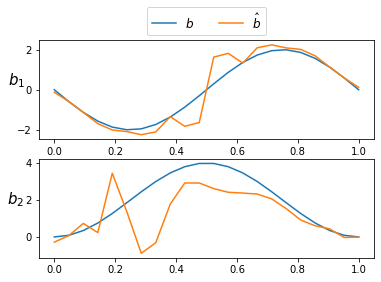

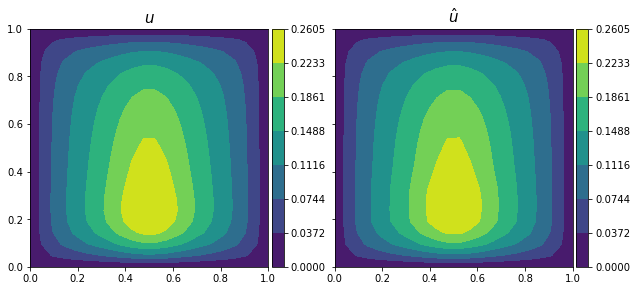

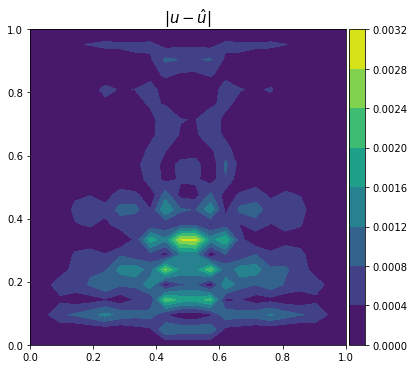

In [9]:
plot_results(results, b0, b_true)

In [10]:
results = optimize_b(b0, u_d, alt_reg=True)

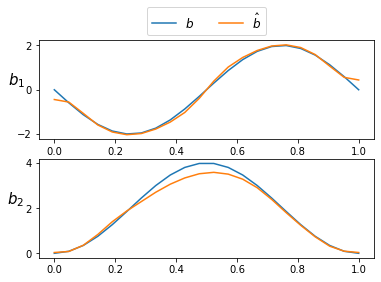

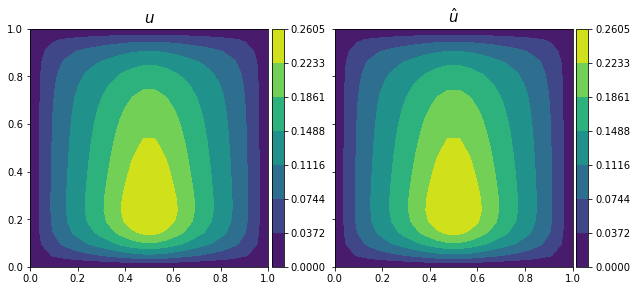

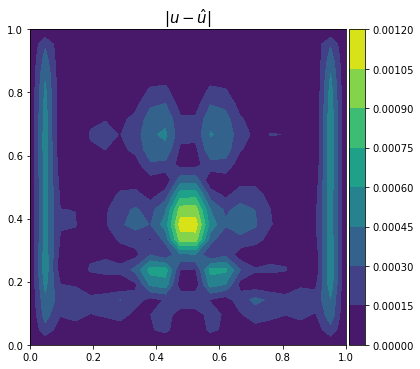

In [11]:
plot_results(results, b0, b_true)